In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks as fp
import sympy as smp
import scipy.odr as odr

In [2]:
arch = open('HR.CSV', 'r')
lines = arch.readlines()[:]
frec = np.array([float(line.split(',')[0]) for line in lines])
abso = np.asarray([float(line.split(',')[1]) for line in lines])

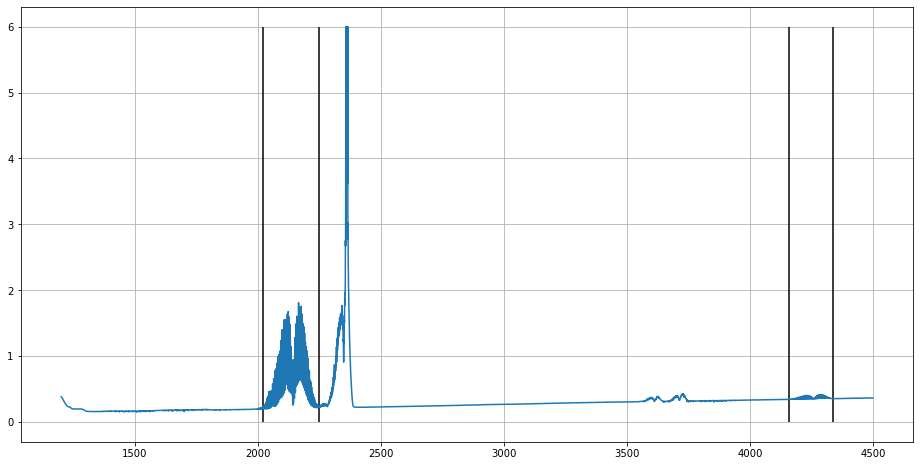

In [14]:
fig, ax = plt.subplots(figsize=(16,8))
#ax.set_xlabel(r'$\nu$ [cm$^{-1}$]', fontsize=12)
#ax.set_ylabel('Absorbancia', fontsize=12)

#ax.set(xlim=(2050, 2225), xticks=np.linspace(2060, 2220,20),
#       ylim=(-0.1, 2))
ax.grid(True)

ax.plot(frec, abso, label=r"Absorbancia vs $\nu$")
#ax.legend(fancybox=True, shadow=True, fontsize=12)
ax.vlines(2020, 0,6)
ax.vlines(2250, 0,6)
ax.vlines(4160, 0,6)
ax.vlines(4340, 0,6)
plt.savefig(fname='Espectro completoAG')
plt.show()


In [4]:
inf, sup = [2020, 4175], [2250, 4340]
lim_inf, lim_sup = [np.where(abs(frec-x) < 0.3)[0][0] for x in inf], [np.where(abs(frec-x) < 0.3)[0][0] for x in sup]
lim_inf

[1701, 6170]

In [33]:
texto = r'''$A = 62(16)$ 
$n = 1,8(1)$'''
plt.text(7,3.8,texto,
         fontsize=15,
         color="black",
         verticalalignment ='top', 
         horizontalalignment ='center',
         bbox ={'facecolor':'white', 
                'pad':10,
               }
        )

SyntaxError: invalid syntax (1259889348.py, line 1)

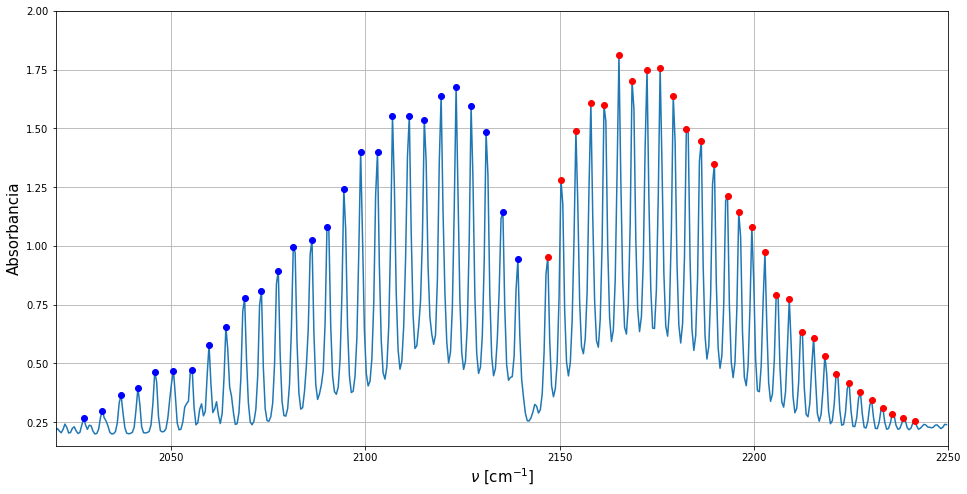

2143.1145

In [16]:
picos_prueba = []
picos = [[],[]]
medios_aprox = [2142, 4260]
medios = []
for i in range(len(lim_inf)):
    peaks, _ = fp(abso[lim_inf[i]:lim_sup[i]]*100, distance = 4, height=25)#
    picos_prueba.append(peaks)
    
    
# Okay, esto va de atrás para adelante. Vi del gráfico de la celda que viene que no me convenía
# tomar los últimos cuatro picos del sobretono así que se los vuelo ahora así no tengo problema
# después con la definición.

picos[0] = np.delete(picos_prueba[0], [7,9,29], 0)
picos[1] = np.delete(picos_prueba[1][1:-4], 18, 0)

for i in range(len(lim_inf)):
    medios.append(np.where(abs(frec[lim_inf[i]:lim_sup[i]][picos[i]] - medios_aprox[i]) < 5)[0])



i=0

abso_peaks = abso[lim_inf[i]:lim_sup[i]]
frec_acot = frec[lim_inf[i]:lim_sup[i]]
fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlabel(r'$\nu$ [cm$^{-1}$]', fontsize=15)
ax.set_ylabel('Absorbancia', fontsize=15)
ax.set(xlim=(frec[lim_inf[i]], frec[lim_sup[i]]), ylim=(0.15, 2))#, xticks=np.linspace(2070, 2220,20))
       #)
ax.grid(True)
ax.plot(frec_acot,abso_peaks, label=r"Absorbancia vs $\nu$")

ax.plot(banda_R, abso[lim_inf[0]:lim_sup[0]][picos[0][medios[0][1]:]], "ro")
ax.plot(banda_P, np.flip(abso[lim_inf[0]:lim_sup[0]][picos[0][:medios[0][0]+1]]), "bo")


'''
for j in range(len(banda_R)):
    texto = r'j={}'.format(j)
    plt.text(banda_R[j],abso[lim_inf[0]:lim_sup[0]][picos[0][medios[0][1]:]][j] +0.15 ,texto,
             fontsize=10,
             color="black",
             verticalalignment ='top', 
             horizontalalignment ='center',
             rotation=90
            )       
for j in range(len(banda_P)):
    texto = r'j={}'.format(j+1)
    plt.text(banda_P[j], np.flip(abso[lim_inf[0]:lim_sup[0]][picos[0][:medios[0][0]+1]])[j] +0.15 ,texto,
             fontsize=10,
             color="black",
             verticalalignment ='top', 
             horizontalalignment ='center',
             rotation=90
            )       
'''

#ax.plot(frec_acot[picos[i]], abso_peaks[picos[i]], "rx")     #Esto me plotea todos los picos
#ax.legend(fancybox= True, shadow=True, fontsize=15)

plt.savefig(fname='TonoAG')
plt.show()

    
    
    
    
medios_centro = [medios[i].mean() for i in [0,1]]
(frec[lim_inf[0]: lim_sup[0]][picos[0]][26] + frec[lim_inf[0]: lim_sup[0]][picos[0]][27])/2
#(R_st[0] + P_st[0])/2


In [17]:
'''banda_R = np.diff(frec[lim_inf[0]:lim_sup[0]][picos[0][medios[0][1]:]])
banda_P = np.diff(frec[lim_inf[0]:lim_sup[0]][picos[0][:medios[0][0]]])'''
banda_R = frec[lim_inf[0]:lim_sup[0]][picos[0][medios[0][1]:]]
banda_P = np.flip(frec[lim_inf[0]:lim_sup[0]][picos[0][:medios[0][0]+1]])
R_st = frec[lim_inf[1]:lim_sup[1]][picos[1][medios[1][1]:]]
P_st = np.flip(frec[lim_inf[1]:lim_sup[1]][picos[1][:medios[1][0]+1]])
P_st

array([4255.854, 4251.997, 4247.658, 4243.8  , 4239.461, 4235.604,
       4231.265, 4226.925, 4222.586, 4218.247, 4213.426, 4209.086,
       4204.265, 4199.443, 4194.622, 4189.801, 4184.979, 4179.676])

In [18]:
# Armo el array de J
jotas_R = np.array(range(len(banda_R))) 
jotas_P = np.array(range(len(banda_P))) + 1
jotas_R_st = np.array(range(len(R_st))) 
jotas_P_st = np.array(range(len(P_st))) + 1
jotas_P_st

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

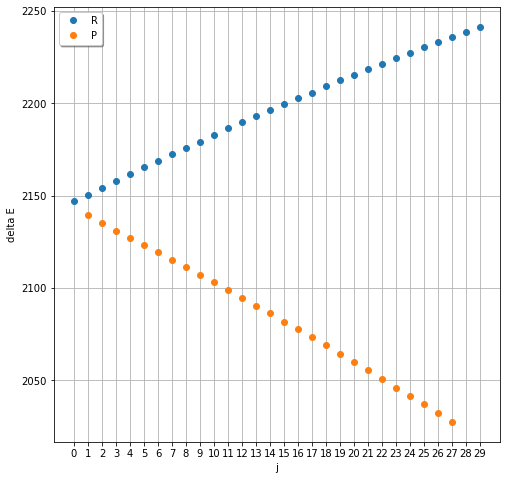

In [19]:
#Gráfico del tono

fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel(r'j')
ax.set_ylabel('delta E')
ax.grid(True)

ax.set(xticks=np.arange(0, 30))

ax.plot(jotas_R, banda_R, 'o', label="R")
ax.plot(jotas_P, banda_P, 'o', label="P")
    
    
ax.legend(fancybox= True, shadow=True)
plt.show()

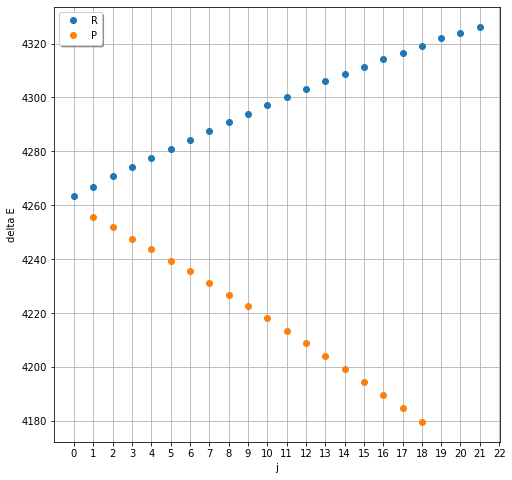

In [20]:
#Gráfico del sobretono

fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel('j')
ax.set_ylabel('delta E')
ax.grid(True)

ax.set(xticks=np.arange(0, 30))

ax.plot(jotas_R_st, R_st, 'o', label="R")
ax.plot(jotas_P_st, P_st, 'o', label="P")
    
    
ax.legend(fancybox= True, shadow=True)
plt.show()

In [21]:
def u(b, x):
    return b[0] + 2*b[1]*(x+1) + b[2]*(x**2+4*x+3)

def w(b, x):
    return b[0] - 2*b[1]*x + b[2]*(x**2-2*x)

f = odr.Model(u)
g = odr.Model(w)

mydata = odr.RealData(jotas_R, banda_R)
myodr = odr.ODR(mydata, f, beta0=[1,1,1])
output = myodr.run()
output.pprint()

mydata2 = odr.RealData(jotas_P, banda_P)
myodr2 = odr.ODR(mydata2, f, beta0=[1,1,1])
output2 = myodr2.run()
output2.pprint()

Beta: [ 2.14286220e+03  1.94009276e+00 -1.85494818e-02]
Beta Std Error: [0.11221234 0.00832325 0.00047428]
Beta Covariance: [[ 4.83876874e+00 -3.17791958e-01  1.59989235e-02]
 [-3.17791958e-01  2.66219444e-02 -1.47986773e-03]
 [ 1.59989235e-02 -1.47986773e-03  8.64399785e-05]]
Residual Variance: 0.002602234168890796
Inverse Condition #: 0.0005419847072893595
Reason(s) for Halting:
  Sum of squares convergence
Beta: [ 2.14681052e+03 -1.88966166e+00 -1.60846942e-02]
Beta Std Error: [0.12393879 0.01042024 0.00064973]
Beta Covariance: [[ 8.86349179e+00 -6.71361803e-01  3.75477400e-02]
 [-6.71361803e-01  6.26535222e-02 -3.81336788e-03]
 [ 3.75477400e-02 -3.81336788e-03  2.43587372e-04]]
Residual Variance: 0.0017330443621388417
Inverse Condition #: 0.000713862690105175
Reason(s) for Halting:
  Sum of squares convergence


Ahora voy a calcular dos cosas para calcular $B_0$ y $B_1$. siendo $B_\nu = B_e - a_e (\nu+1/2)$

$$
diff1 = R_{j-1} - P_{j+1} = 2B_0 (2j+1)\\
diff2 = R_j - P_j = 2B_1 (2j+1)\\
suma1 = (R_j + P_j)/2 = \nu_0 + B_1 + (B_1-B_0)j(j+1)\\
suma2 = (Rst_j + Pst_j)/2 = \nu_2 + B_2 + (B_2-B_0)j(j+1)
$$

In [22]:
print(len(banda_R), len(banda_P), len(jotas_R), len(jotas_P))
print(len(R_st), len(P_st), len(jotas_R_st), len(jotas_P_st))

30 27 30 27
22 18 22 18


In [23]:
diff1 = banda_R[:-4] - banda_P[1:]
diff2 = banda_R[1:-2] - banda_P
suma1 = (banda_R[1:-2] + banda_P)/2

suma2 = (R_st[1:-3] + P_st)/2

In [24]:
def lineal(b, x):
    return 2*b[0]*x
def cuadratica(b, x):                  # Esta la usé al principio pero en realidad no va, tengo que hacer un ajuste lineal
    return b[0] + b[1]*x*(x+1)
def lineal2(b,x):
    return b[0] + b[1]*x


h = odr.Model(lineal)
s = odr.Model(cuadratica)
q = odr.Model(lineal2)

# Ajustes para el tono

mydata = odr.RealData(2*jotas_P[:-1]+1, diff1)
myodr = odr.ODR(mydata, h, beta0=[1])
output = myodr.run()
output.pprint()

mydata2 = odr.RealData(2*jotas_P+1, diff2)
myodr2 = odr.ODR(mydata2, h, beta0=[4])
output2 = myodr2.run()
output2.pprint()

mydata3 = odr.RealData(jotas_P*(jotas_P+1), suma1)
myodr3 = odr.ODR(mydata3, q, beta0=[1, -0.1])
output3 = myodr3.run()
output3.pprint()

# Ajustes para el sobretono

mydata4 = odr.RealData(jotas_P_st*(jotas_P_st+1), suma2)
myodr4 = odr.ODR(mydata4, q, beta0=[1, -0.1])
output4 = myodr4.run()
output4.pprint()

Beta: [1.91640413]
Beta Std Error: [0.00079786]
Beta Covariance: [[0.00014952]]
Residual Variance: 0.004257377936683038
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
Beta: [1.89857537]
Beta Std Error: [0.00095419]
Beta Covariance: [[0.00013174]]
Residual Variance: 0.006911116272622114
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
Beta: [ 2.14481043e+03 -1.73165131e-02]
Beta Std Error: [2.91743478e-02 8.17960803e-05]
Beta Covariance: [[ 8.73561180e-02 -1.85864491e-04]
 [-1.85864491e-04  6.86682530e-07]]
Residual Variance: 0.009743365315470992
Inverse Condition #: 0.018192044830084266
Reason(s) for Halting:
  Sum of squares convergence
Beta: [ 4.26144641e+03 -3.49527716e-02]
Beta Std Error: [0.03849219 0.0002326 ]
Beta Covariance: [[ 1.34310400e-01 -6.21226317e-04]
 [-6.21226317e-04  4.90451778e-06]]
Residual Variance: 0.01103152708020688
Inverse Condition #: 0.03849729402684472
Reason(s) for Halting:
  Sum of squares converge

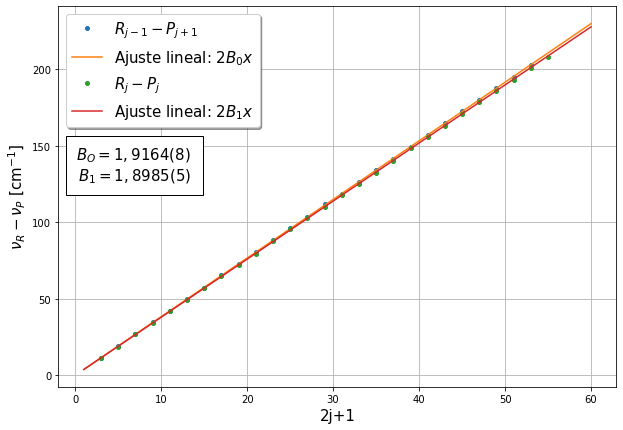

In [80]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set_xlabel('2j+1', fontsize=15)
ax.set_ylabel(r'$\nu_R - \nu_P$ [cm$^{-1}$]', fontsize=15)
ax.grid(True)
#ax.set(xticks=np.arange(-1, 61, 2))

x = np.linspace(1,60,200)

ax.plot((2*jotas_P+1)[:-1], diff1, 'o', ms=4, label=r"$R_{j-1} - P_{j+1}$")
ax.plot(x, lineal(output.beta, x), label=r'Ajuste lineal: $2B_0x$')
ax.plot((2*jotas_P+1), diff2, 'o', ms=4, label=r"$R_{j} - P_{j}$")
ax.plot(x, lineal(output2.beta, x), label=r'Ajuste lineal: $2B_1x$')

texto = r'''$B_O = 1,9164(8)$ 
$B_1 = 1,8985(5)$'''
plt.text(6.9,150,texto,
         fontsize=15,
         color="black",
         verticalalignment ='top', 
         horizontalalignment ='center',
         bbox ={'facecolor':'white', 
                'pad':10,
               }
        )       

ax.legend(fancybox= True, shadow=True, fontsize=15)
plt.savefig(fname='Ajuste_B_tono')
plt.show()

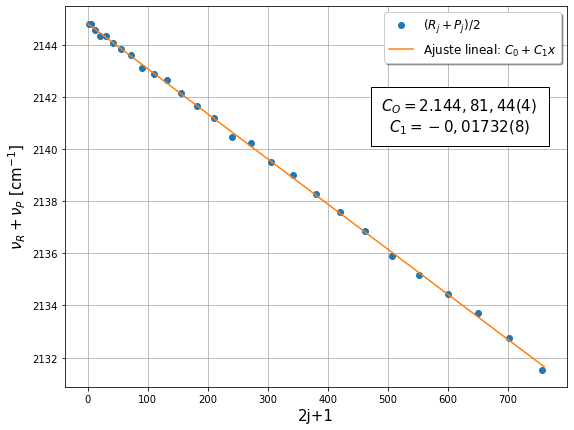

In [81]:
fig, ax = plt.subplots(figsize=(9,7))
ax.set_xlabel('2j+1', fontsize=15)
ax.set_ylabel(r'$\nu_R + \nu_P$ [cm$^{-1}$]', fontsize=15)
ax.grid(True)
#ax.set(xticks=np.arange(-1, 51, 2))

x2 = np.linspace(0,760,1500)

ax.plot((jotas_P*(jotas_P+1)), suma1, 'o', label=r"$(R_j + P_j)/2$")
ax.plot(x2, lineal2(output3.beta, x2), label='Ajuste lineal: $C_0 + C_1 x$')

texto = r'''$C_O = 2.144,81,44(4)$ 
$C_1 = -0,01732(8)$'''
plt.text(620,2142,texto,
         fontsize=15,
         color="black",
         verticalalignment ='top', 
         horizontalalignment ='center',
         bbox ={'facecolor':'white', 
                'pad':10,
               }
        )       

ax.legend(fancybox= True, shadow=True,fontsize=12)
plt.savefig(fname='Ajuste_nu_tono')
plt.show()

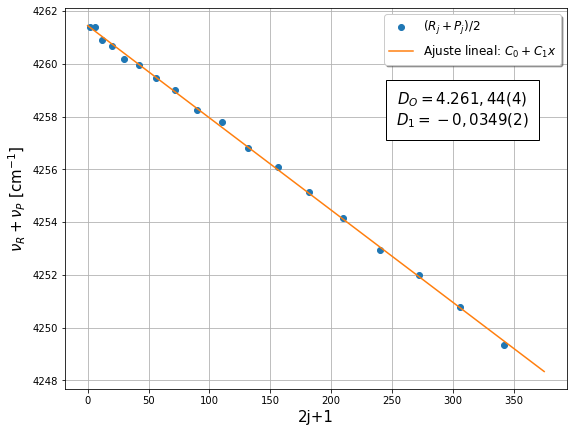

In [82]:
fig, ax = plt.subplots(figsize=(9,7))
ax.set_xlabel('2j+1', fontsize=15)
ax.set_ylabel(r'$\nu_R + \nu_P$ [cm$^{-1}$]', fontsize=15)
ax.grid(True)
#ax.set(xticks=np.arange(-1, 51, 2))

x2 = np.linspace(0,375,1500)

ax.plot((jotas_P_st*(jotas_P_st+1)), suma2, 'o', label=r"$(R_j + P_j)/2$")
ax.plot(x2, lineal2(output4.beta, x2), label='Ajuste lineal: $C_0 + C_1 x$')

texto = r'''$D_O = 4.261,44(4)$ 
$D_1 = -0,0349(2)$'''
plt.text(308,4259,texto,
         fontsize=15,
         color="black",
         verticalalignment ='top', 
         horizontalalignment ='center',
         bbox ={'facecolor':'white', 
                'pad':10,
               }
        )       

ax.legend(fancybox= True, shadow=True,fontsize=12)
plt.savefig(fname='Ajuste_nu_sobretono')
plt.show()

## Las cuentas con sympy

In [16]:
h, w, n, x, j, a, B = smp.symbols(r'\hbar \omega \nu \chi j a_e B_0', real=True)
E_n_j = smp.symbols('E', cls=smp.Function); E_n_j = E_n_j(n, j)
E_n_j = h*w*(n+smp.Rational(1,2)) - h*x*w*(n+smp.Rational(1,2))**2 + B*(1-a*(n+smp.Rational(1,2)))*j*(j+1)

In [17]:
E_n_j

B_0*j*(j + 1)*(-a_e*(\nu + 1/2) + 1) - \chi*\hbar*\omega*(\nu + 1/2)**2 + \hbar*\omega*(\nu + 1/2)

In [18]:
E_salida = E_n_j.subs(n, 0)
E_llegada_R = E_n_j.subs([(n,1), (j, j+1)])
E_llegada_P = E_n_j.subs([(n,1), (j, j-1)])

In [19]:
E_salida

B_0*j*(1 - a_e/2)*(j + 1) - \chi*\hbar*\omega/4 + \hbar*\omega/2

In [20]:
E_llegada_R

B_0*(1 - 3*a_e/2)*(j + 1)*(j + 2) - 9*\chi*\hbar*\omega/4 + 3*\hbar*\omega/2

In [21]:
E_llegada_P

B_0*j*(1 - 3*a_e/2)*(j - 1) - 9*\chi*\hbar*\omega/4 + 3*\hbar*\omega/2

In [22]:
Delta_E_tono_R = (E_llegada_R - E_salida).expand()
Delta_E_tono_R.factor(B, a)

-B_0*a_e*(j**2 + 4*j + 3) - B_0*(-2*j - 2) - 2*\chi*\hbar*\omega + \hbar*\omega

In [23]:
Delta_E_tono_P = (E_llegada_P - E_salida).expand()
Delta_E_tono_P.factor(B, a)

-B_0*a_e*(j**2 - 2*j) - 2*B_0*j - 2*\chi*\hbar*\omega + \hbar*\omega

In [24]:
E_llegada_R_s = E_n_j.subs([(n,2), (j, j+1)])
E_llegada_P_s = E_n_j.subs([(n,2), (j, j-1)])
Delta_E_tono_P_s = (E_llegada_P_s - E_salida).expand()
Delta_E_tono_R_s = (E_llegada_R_s - E_salida).expand()

In [25]:
Delta_E_tono_P_s

-2*B_0*a_e*j**2 + 3*B_0*a_e*j - 2*B_0*j - 6*\chi*\hbar*\omega + 2*\hbar*\omega

In [26]:
Delta_E_tono_R_s

-2*B_0*a_e*j**2 - 7*B_0*a_e*j - 5*B_0*a_e + 2*B_0*j + 2*B_0 - 6*\chi*\hbar*\omega + 2*\hbar*\omega